# Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('medical_cost_insurance')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.shape

(1338, 7)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Key Observation: 1. The Mean is more than median (50th Percentile) in all columns.

# Exploratory Data Analysis

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Key Observation: There is no null value found

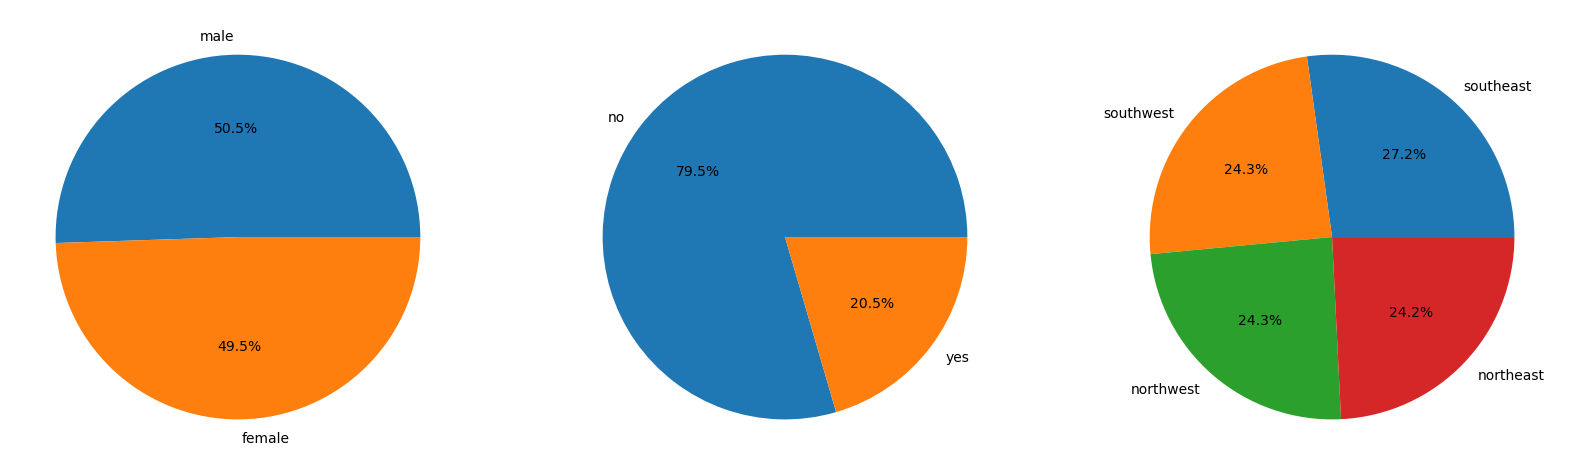

In [19]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

Key Observation:The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

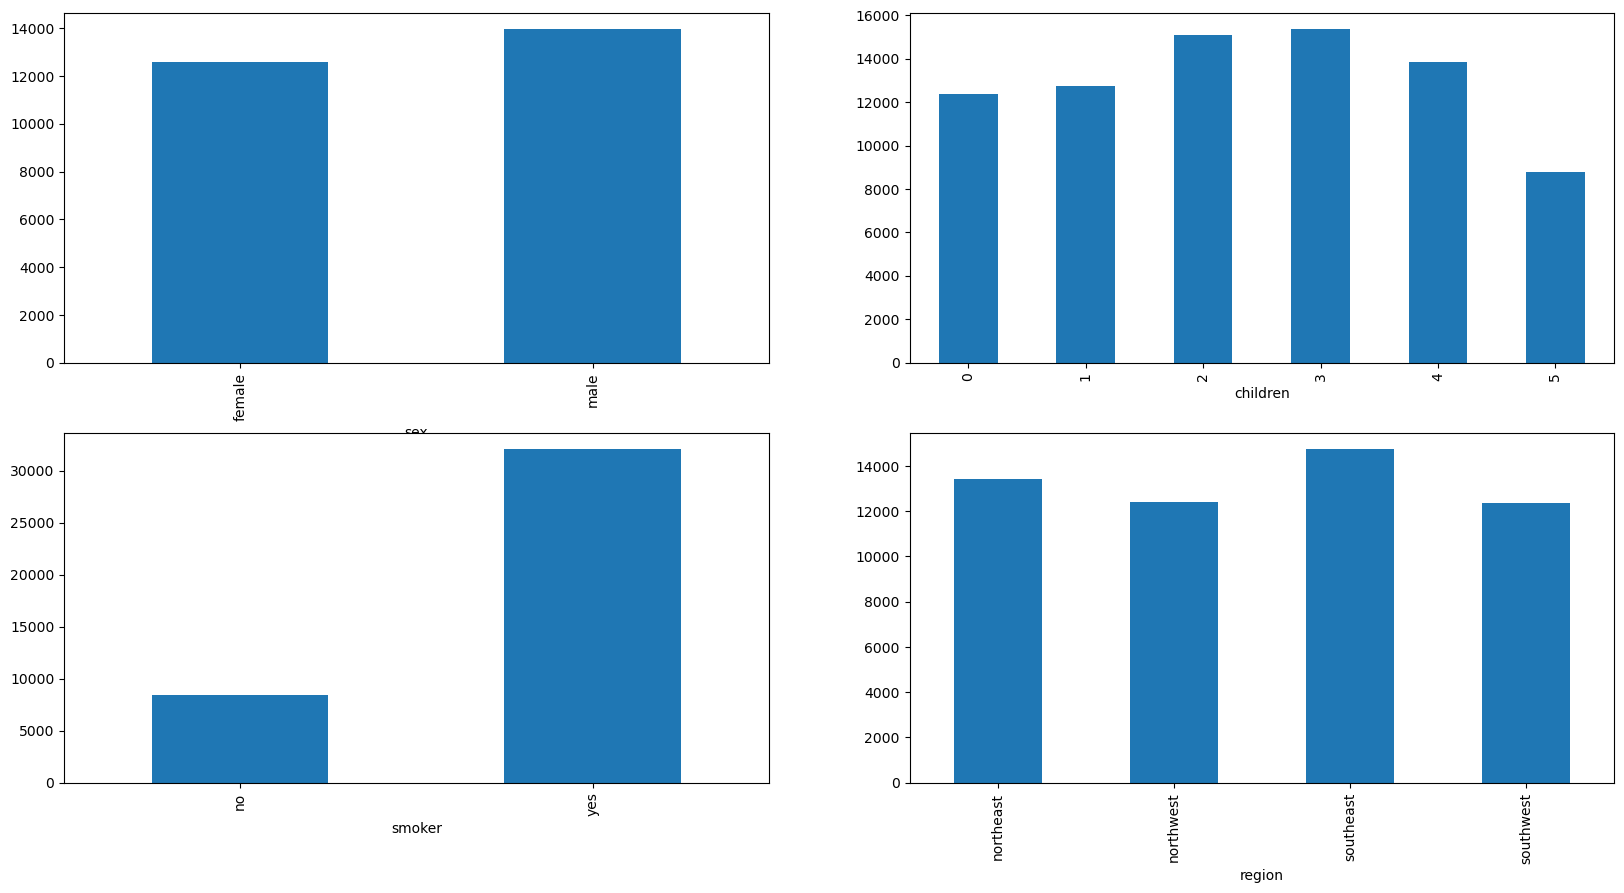

In [20]:
features = ['sex', 'children', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Key Observation:Now let’s look at some of the observations which are shown in the above graphs:
Charges are on the higher side for males as compared to females but the difference is not that much.
Premium charged from the smoker is around thrice that which is charged from non-smokers.
Charges are approximately the same in the given four regions.

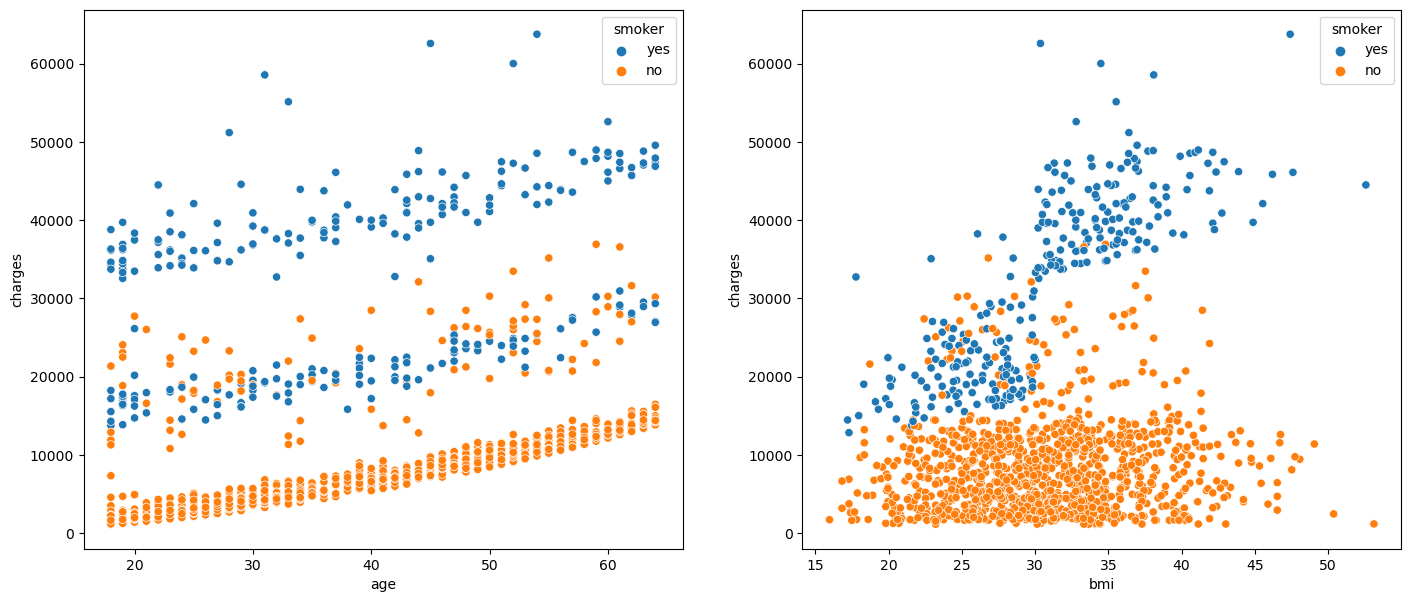

In [21]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

Key Obsevation: A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

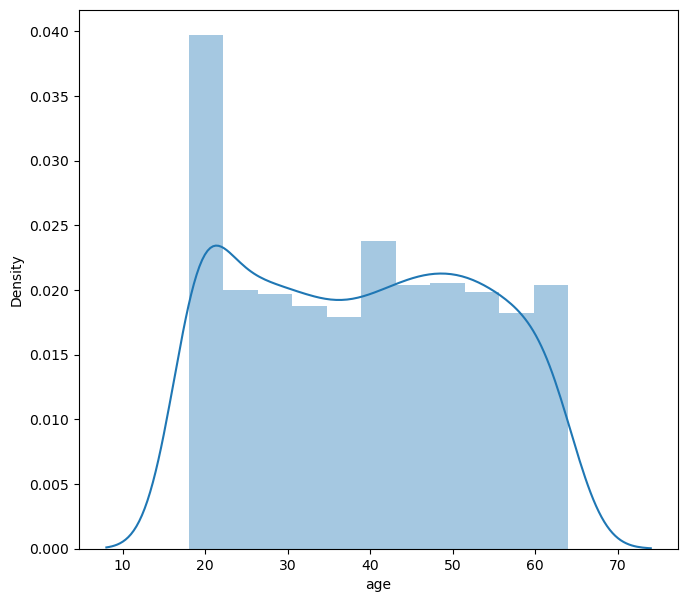

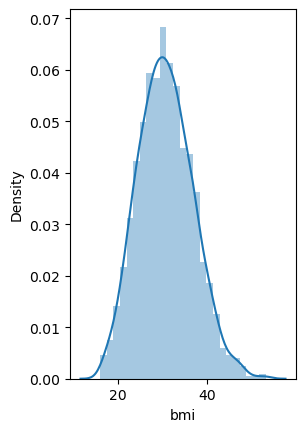

In [27]:
features=['age','bmi']
plt.subplots(figsize=(17,7))
for i, col in enumerate(features):
    plt.subplot(1,2,i+1)
    sb.distplot(df[col])
    plt.show()

Key Observation: Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

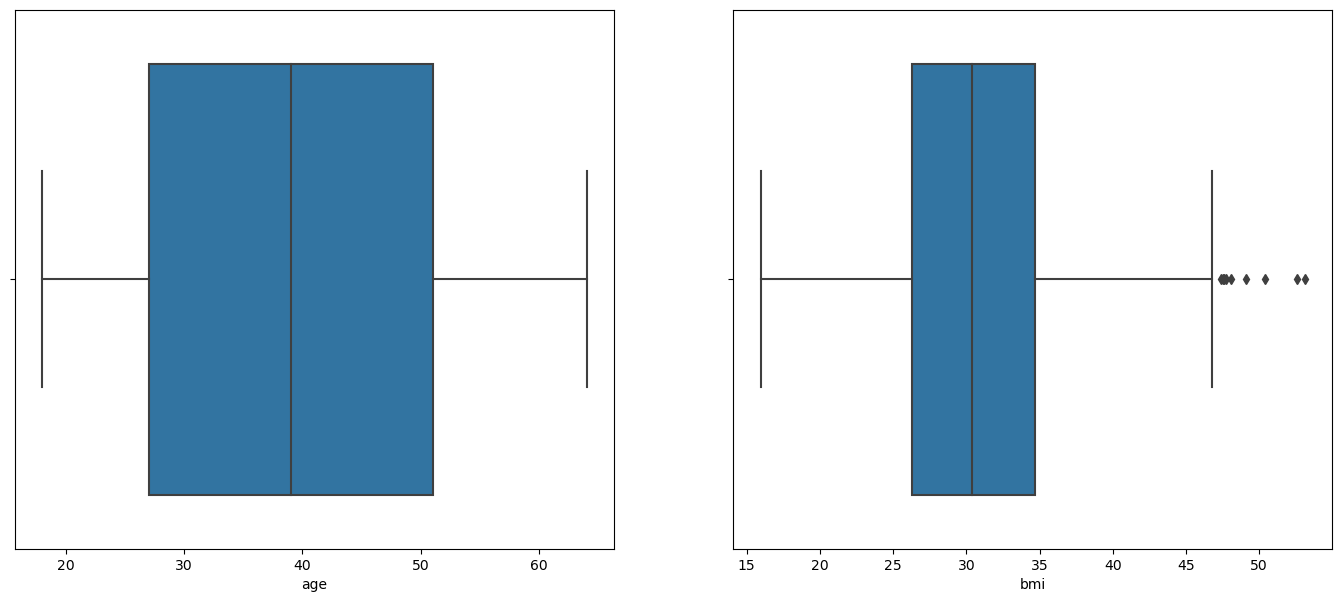

In [28]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

Key Observation: Ah! there are outliers in the BMI column of the given dataset. Let’s check how many rows of the dataset we will lose if we remove those outliers.

In [29]:
df.shape, df[df['bmi']<45].shape

((1338, 7), (1318, 7))

key Observation: We will lose only 20 data points and the dataset will become free from any outliers so, we can do this sacrifice.

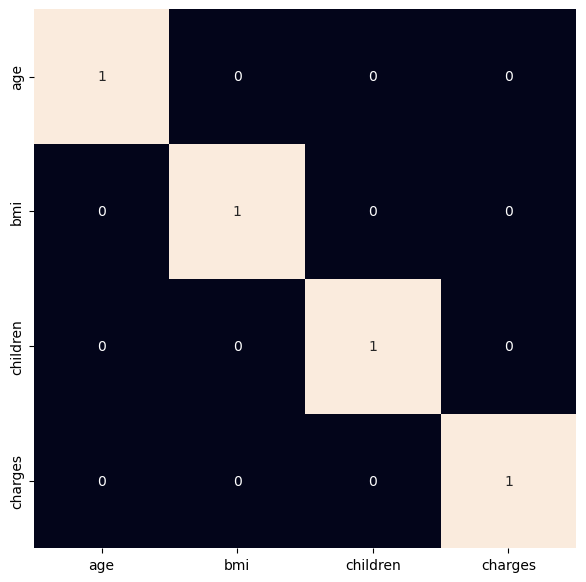

In [30]:
plt.figure(figsize=(7, 7))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

key Observation: From the above heatmap, it is certain that there are no highly correlated features in it.